# Загрузка данных

Библиотеки:

In [1]:
#для работы с данными
import numpy as np
import pandas as pd

#для лемматизации
from pymorphy2 import MorphAnalyzer

#для векторизации и кластеризации
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster 

#визуализация
import matplotlib.pyplot as plt

# Файлы

Считываем наборы фраз из 'phrase.txt'. Кодировка: utf-8

In [2]:
keywords = [phrase.lower().rstrip() for phrase in open('phrase.txt', encoding='utf-8')]

Как сейчас представлены данные

In [3]:
df = pd.DataFrame(keywords, columns=['Фраза'])
df

,Фраза
0,видеонаблюдение
1,камеры видеонаблюдения
2,системы видеонаблюдения
3,видеонаблюдение для дома
4,видеонаблюдение для офиса
...,...
100,видеонаблюдение для гостиниц
101,видеонаблюдение на заброшенных объектах
102,видеонаблюдение на нескольких камерах
103,видеонаблюдение на ферме


# Обработка данных

## Избавление от предлогов

В данных представленны предлоги. Создали список предлогов 'spisok_predlogov.txt' и запишем отдельных стоблец без них.

In [4]:
list_of_pretext = [phrase.rstrip() for phrase in open('spisok_predlogov.txt', encoding='utf-8')]

Разбиваем наши фразы на слова.

In [5]:
df['Фраза_по_словам'] = df['Фраза'].str.split()
df

,Фраза,Фраза_по_словам
0,видеонаблюдение,[видеонаблюдение]
1,камеры видеонаблюдения,"[камеры, видеонаблюдения]"
2,системы видеонаблюдения,"[системы, видеонаблюдения]"
3,видеонаблюдение для дома,"[видеонаблюдение, для, дома]"
4,видеонаблюдение для офиса,"[видеонаблюдение, для, офиса]"
...,...,...
100,видеонаблюдение для гостиниц,"[видеонаблюдение, для, гостиниц]"
101,видеонаблюдение на заброшенных объектах,"[видеонаблюдение, на, заброшенных, объектах]"
102,видеонаблюдение на нескольких камерах,"[видеонаблюдение, на, нескольких, камерах]"
103,видеонаблюдение на ферме,"[видеонаблюдение, на, ферме]"


Создаем столбец без предлогов.

In [6]:
def find_predlogov_words(splitted_phrase):
    arr = []
    for word in splitted_phrase:
        if word not in list_of_pretext:
            arr.append(word)
    return arr


In [7]:
df['без_предлогов'] = df['Фраза_по_словам'].apply(find_predlogov_words)
df

,Фраза,Фраза_по_словам,без_предлогов
0,видеонаблюдение,[видеонаблюдение],[видеонаблюдение]
1,камеры видеонаблюдения,"[камеры, видеонаблюдения]","[камеры, видеонаблюдения]"
2,системы видеонаблюдения,"[системы, видеонаблюдения]","[системы, видеонаблюдения]"
3,видеонаблюдение для дома,"[видеонаблюдение, для, дома]","[видеонаблюдение, дома]"
4,видеонаблюдение для офиса,"[видеонаблюдение, для, офиса]","[видеонаблюдение, офиса]"
...,...,...,...
100,видеонаблюдение для гостиниц,"[видеонаблюдение, для, гостиниц]","[видеонаблюдение, гостиниц]"
101,видеонаблюдение на заброшенных объектах,"[видеонаблюдение, на, заброшенных, объектах]","[видеонаблюдение, заброшенных, объектах]"
102,видеонаблюдение на нескольких камерах,"[видеонаблюдение, на, нескольких, камерах]","[видеонаблюдение, нескольких, камерах]"
103,видеонаблюдение на ферме,"[видеонаблюдение, на, ферме]","[видеонаблюдение, ферме]"


# Лемматизация

Проводим лемматизацию с помощью MorphAnalyzer.

In [8]:
m = MorphAnalyzer()

df['Леммы'] = [' '.join([m.parse(word)[0].normal_form for word in x]) for x in df['без_предлогов']]
df

,Фраза,Фраза_по_словам,без_предлогов,Леммы
0,видеонаблюдение,[видеонаблюдение],[видеонаблюдение],видеонаблюдение
1,камеры видеонаблюдения,"[камеры, видеонаблюдения]","[камеры, видеонаблюдения]",камера видеонаблюдение
2,системы видеонаблюдения,"[системы, видеонаблюдения]","[системы, видеонаблюдения]",система видеонаблюдение
3,видеонаблюдение для дома,"[видеонаблюдение, для, дома]","[видеонаблюдение, дома]",видеонаблюдение дом
4,видеонаблюдение для офиса,"[видеонаблюдение, для, офиса]","[видеонаблюдение, офиса]",видеонаблюдение офис
...,...,...,...,...
100,видеонаблюдение для гостиниц,"[видеонаблюдение, для, гостиниц]","[видеонаблюдение, гостиниц]",видеонаблюдение гостиница
101,видеонаблюдение на заброшенных объектах,"[видеонаблюдение, на, заброшенных, объектах]","[видеонаблюдение, заброшенных, объектах]",видеонаблюдение забросить объект
102,видеонаблюдение на нескольких камерах,"[видеонаблюдение, на, нескольких, камерах]","[видеонаблюдение, нескольких, камерах]",видеонаблюдение несколько камера
103,видеонаблюдение на ферме,"[видеонаблюдение, на, ферме]","[видеонаблюдение, ферме]",видеонаблюдение ферма


# Векторизация

С помощью TfidfVectorizer проводим векторизацию набора слов.

In [9]:
tvidf_v = TfidfVectorizer(min_df=1)

In [10]:
vectorized_lemmas = tvidf_v.fit_transform(df['Леммы'])

In [11]:
pd.DataFrame(data=vectorized_lemmas.toarray(), columns=tvidf_v.get_feature_names_out(), index=df['Леммы'])

,cада,fi,ip,sd,sms,wi,автомобиль,автомобильный,анализ,аптека,...,удалённый,улица,уличный,фабрика,ферма,фонарный,функция,хранилище,цифровой,энергетика
Леммы,,,,,,,,,,,,,,,,,,,,,
видеонаблюдение,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
камера видеонаблюдение,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
система видеонаблюдение,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
видеонаблюдение дом,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
видеонаблюдение офис,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
видеонаблюдение гостиница,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
видеонаблюдение забросить объект,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
видеонаблюдение несколько камера,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


# Кластеризация

## Ввод количества кластеров

In [12]:
while True:
    cluster_count = int(input())
    if 0 < cluster_count:
        break

5


С помощью k-means проводим кластеризацию. Мы рассмотрим кластеризацию по составу фраз, которая позволит выделить те словосочетания, которые между собой сильно связаны и имеют большое количество пересечений значимых слов.

In [13]:
km_clustering = KMeans(

    n_clusters= cluster_count,

    init='k-means++',

    n_init=100,

    max_iter=300,

    tol=0.0001

                    )

In [14]:
df['Кластер'] = km_clustering.fit_predict(vectorized_lemmas)

Посмотрим, как выглядят сейчас наши данные.

In [15]:
df[df['Кластер'] == 0]

,Фраза,Фраза_по_словам,без_предлогов,Леммы,Кластер
5,видеонаблюдение для склада,"[видеонаблюдение, для, склада]","[видеонаблюдение, склада]",видеонаблюдение склад,0
42,камеры видеонаблюдения для склада,"[камеры, видеонаблюдения, для, склада]","[камеры, видеонаблюдения, склада]",камера видеонаблюдение склад,0
65,камеры видеонаблюдения для контроля передвижен...,"[камеры, видеонаблюдения, для, контроля, перед...","[камеры, видеонаблюдения, контроля, передвижен...",камера видеонаблюдение контроль передвижение т...,0
92,видеонаблюдение на складе,"[видеонаблюдение, на, складе]","[видеонаблюдение, складе]",видеонаблюдение склад,0
104,видеонаблюдение на складах продуктового хранилища,"[видеонаблюдение, на, складах, продуктового, х...","[видеонаблюдение, складах, продуктового, храни...",видеонаблюдение склад продуктовый хранилище,0


# Сохранение данных

In [16]:
writer_kernel = pd.ExcelWriter('ready_table.xlsx', engine='xlsxwriter')
df.to_excel(writer_kernel)
writer_kernel.save()

C:\Users\Yamut\AppData\Local\Temp\ipykernel_16768\3618475220.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer_kernel.save()


### Ставим в соответствие кластеру его представителя.

In [17]:
df2 = df.copy()

In [18]:
df2['Название_кластера'] = df2['Леммы'].str.split()

In [19]:
df_cluster_with_name = df2.pivot_table(index=['Кластер'], values='Название_кластера', aggfunc='sum').reset_index()

In [20]:
df_cluster_with_name['Название_кластера'] = df_cluster_with_name['Название_кластера'].apply(lambda x: list(set(x)))
df_cluster_with_name

,Кластер,Название_кластера
0,0,"[видеонаблюдение, склад, камера, хранилище, пе..."
1,1,"[парковка, sms-уведомление, зум, телефон, рабо..."
2,2,"[камера, wi-fi, видеонаблюдение]"
3,3,"[парковка, свет, нарушение, работа, сотрудник,..."
4,4,"[одежда, видеонаблюдение, магазин, продовольст..."


# Иерархическая кластеризация

Иерархические алгоритмы строят не одно разбиение выборки на непересекающиеся кластеры, а систему вложенных разбиений. На выходе мы получаем дерево кластеров, корнем которого является вся выборка, а листьями – наиболее мелкие кластера.

In [21]:
vectorizer = CountVectorizer(min_df = 1, token_pattern = '[^\ ]+')
X = vectorizer.fit_transform(keywords)

In [22]:
link_M = linkage(X.toarray(), method = 'ward')

In [23]:
while True:
    cluster_count_Ier = int(input())
    if 0 < cluster_count_Ier:
        break

5


In [24]:
clusters = fcluster(link_M, cluster_count_Ier, criterion = 'maxclust')

dct = {}
for key, label in zip(keywords, clusters):
    dct[label] = dct.get(label, []) + [key]


In [25]:
print(dct[3])

['видеонаблюдение', 'видеонаблюдение для дома', 'видеонаблюдение для офиса', 'видеонаблюдение для склада', 'видеонаблюдение для магазина', 'видеонаблюдение для автомобиля', 'беспроводное видеонаблюдение', 'ip видеонаблюдение', 'видеонаблюдение онлайн', 'цифровое видеонаблюдение', 'видеонаблюдение через интернет', 'облачное видеонаблюдение', 'дистанционное видеонаблюдение', 'видеонаблюдение с записью', 'видеонаблюдение для коттеджа', 'видеонаблюдение ночью', 'видеонаблюдение с датчиками', 'видеонаблюдение с wi-fi', 'видеонаблюдение со звуком', 'видеонаблюдение с sms-уведомлением', 'видеонаблюдение с датчиком движения', 'видеонаблюдение с круглосуточной записью', 'видеонаблюдение для бизнеса', 'видеонаблюдение приближенного действия', 'видеонаблюдение с функцией зума', 'видеонаблюдение для транспорта', 'видеонаблюдение автомобильное', 'видеонаблюдение с удаленным доступом', 'видеонаблюдение для гостиниц']


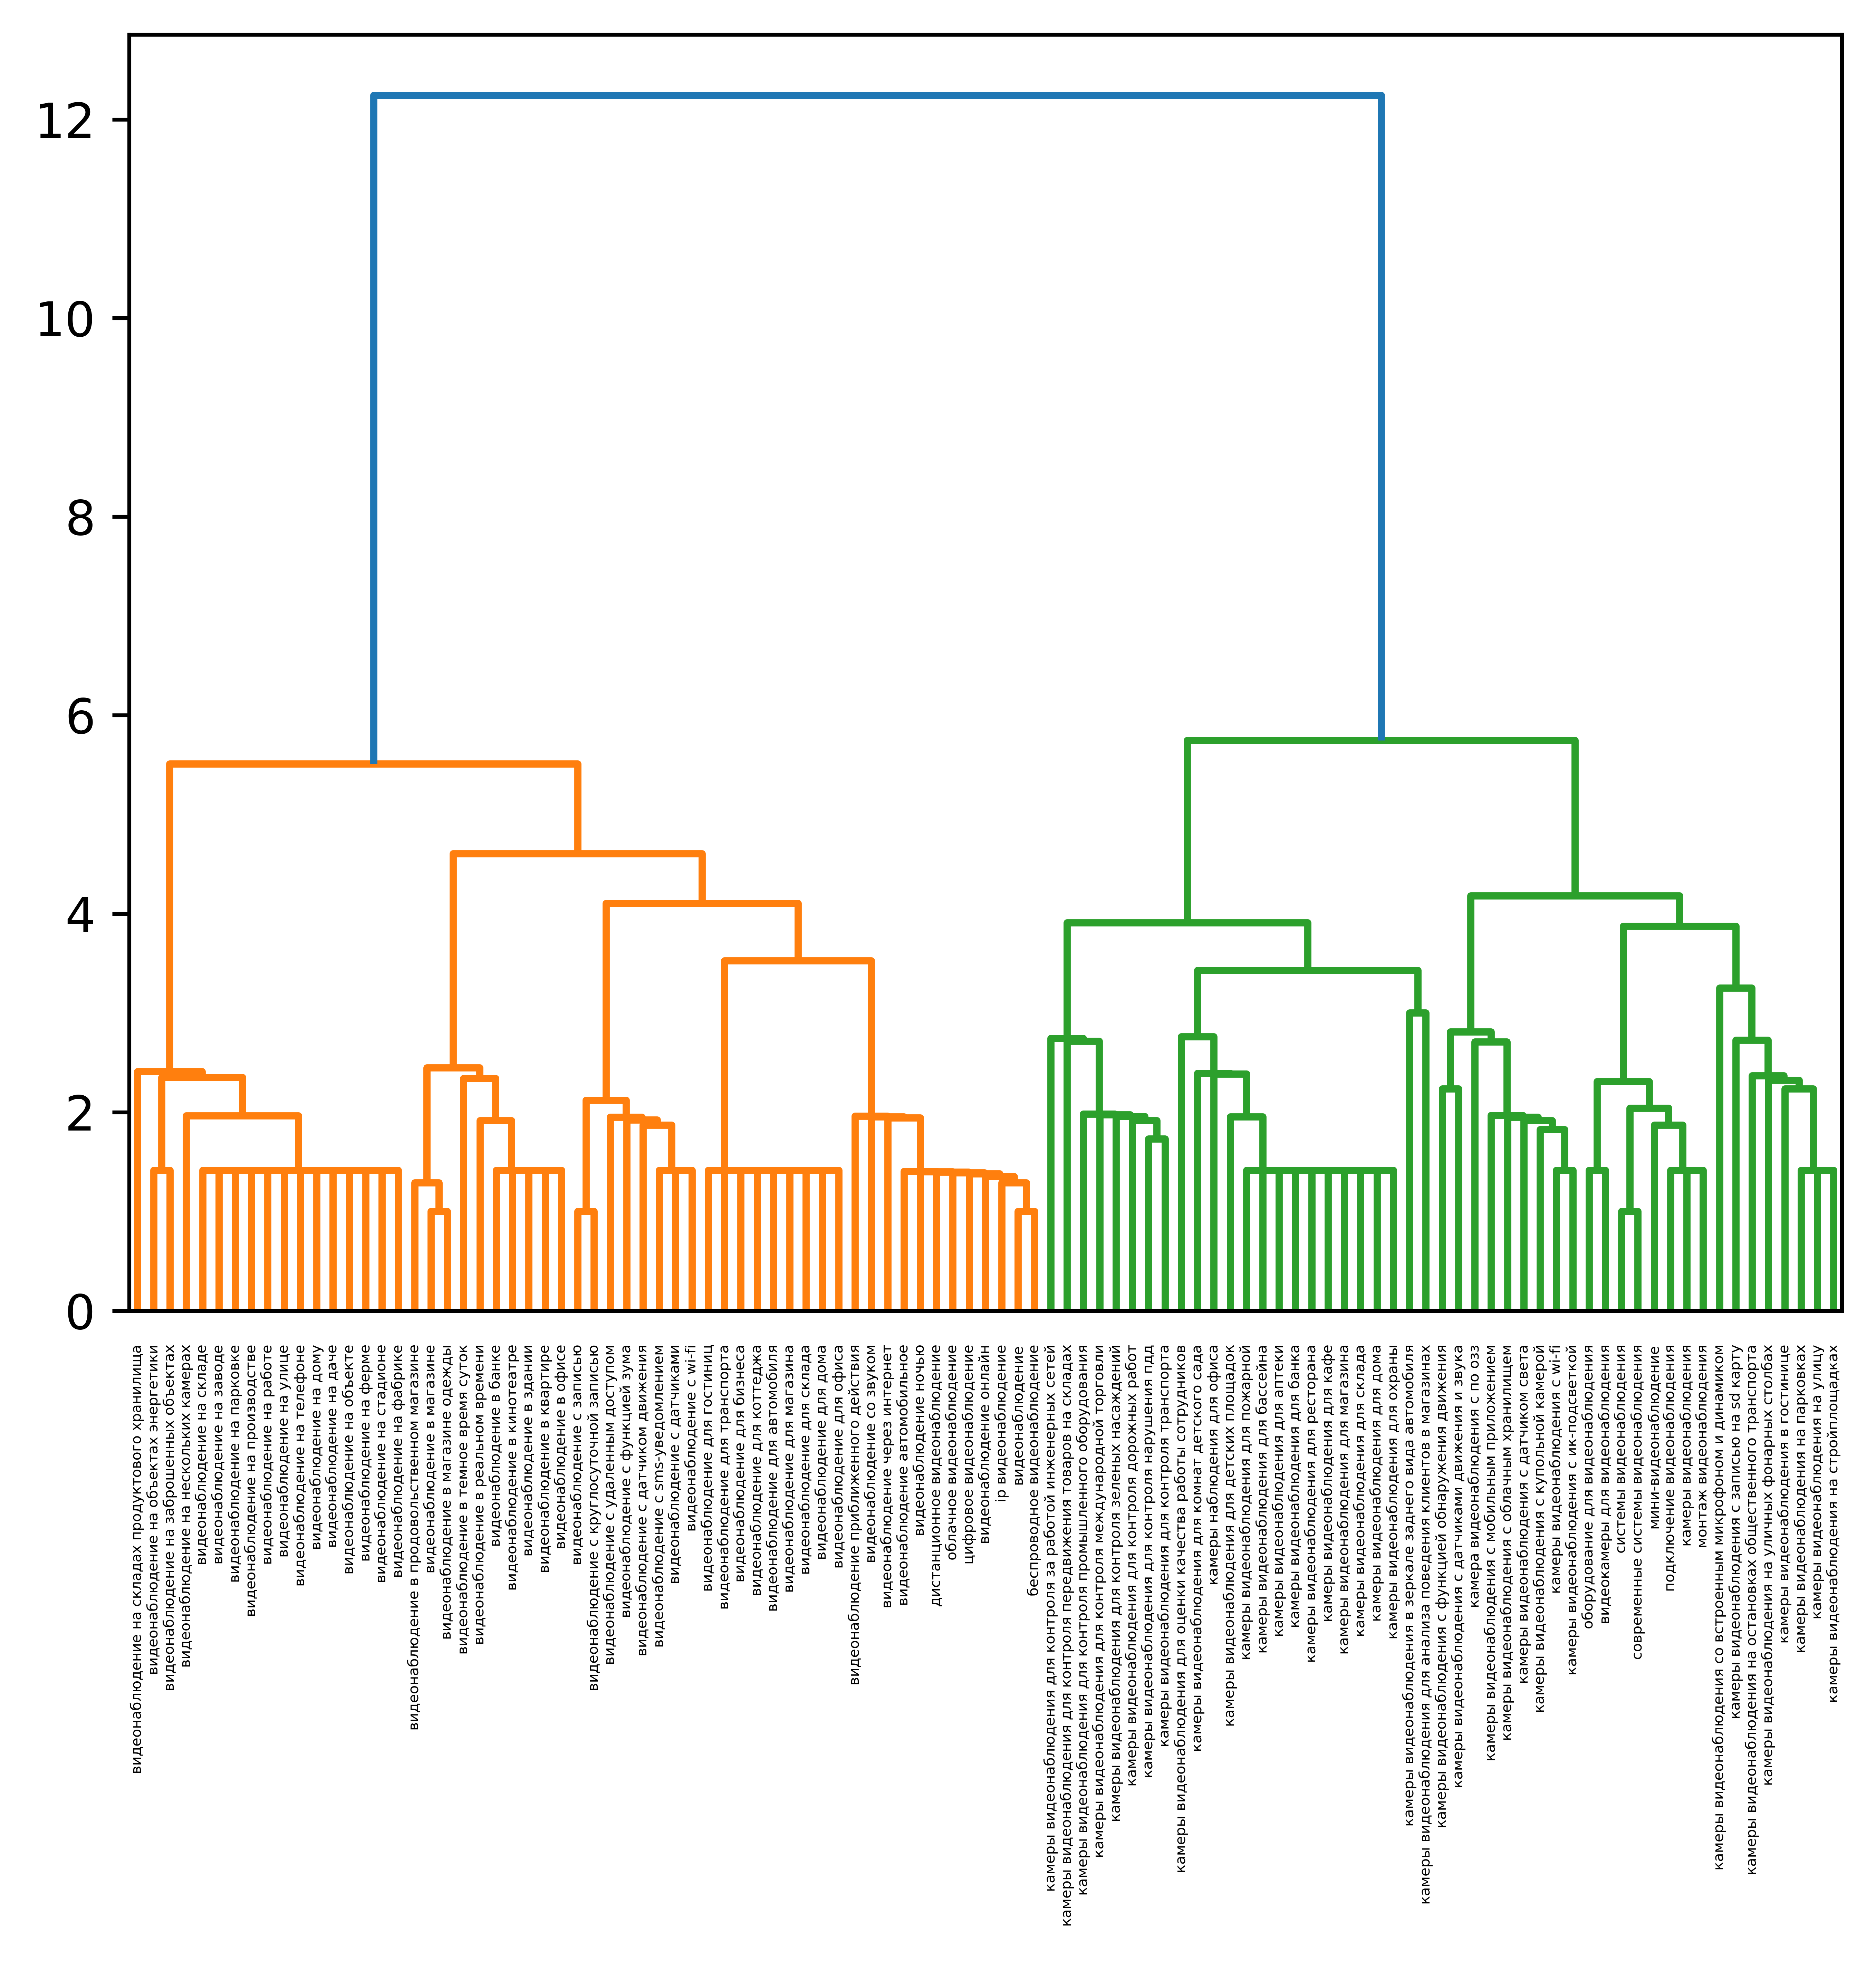

In [27]:
fig, ax = plt.subplots()
fig.set_dpi(1000)
dendrogram(link_M, ax = ax, labels = keywords, leaf_font_size = 3)
plt.show()